# Assignment 8

In [1]:
!pip install rasterio
!pip install rasterstats

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

from rasterstats import zonal_stats

## Question 1

Get the 15 variables from this raster for all Peru departments polygons. This is the link where shapefiles are located. This is the link of the source raster. The values should be the percentage of district area cover by this specific
Morphological Settlement Zone.

In [18]:
depa = gpd.read_file("../../_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp")
depa = depa.to_crs('esri:54009')
depa = depa[['CCDD', 'NOMBDEP', 'CAPITAL', 'geometry']]
depa

,CCDD,NOMBDEP,CAPITAL,geometry
0,01,AMAZONAS,CHACHAPOYAS,"POLYGON ((-7792169.198 -369977.341, -7792239.4..."
1,02,ANCASH,HUARAZ,"POLYGON ((-7734578.955 -994191.696, -7734565.2..."
2,03,APURIMAC,ABANCAY,"POLYGON ((-7270386.011 -1623441.123, -7270292...."
3,04,AREQUIPA,AREQUIPA,"POLYGON ((-7068605.941 -1802675.352, -7068565...."
4,05,AYACUCHO,AYACUCHO,"POLYGON ((-7347505.611 -1501033.916, -7347646...."
5,06,CAJAMARCA,CAJAMARCA,"POLYGON ((-7795192.034 -958786.093, -7795243.4..."
6,07,CALLAO,CALLAO,"POLYGON ((-7629126.935 -1457284.548, -7629105...."
7,08,CUSCO,CUSCO,"POLYGON ((-7226452.405 -1387808.831, -7226306...."
8,09,HUANCAVELICA,HUANCAVELICA,"POLYGON ((-7372714.774 -1477995.808, -7372676...."
9,10,HUANUCO,HUANUCO,"POLYGON ((-7566554.467 -1027471.984, -7566363...."


In [10]:
rasters_1 = ['GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R9_C10.tif',
              'GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R9_C11.tif',
              'GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R9_C12.tif',
              'GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R10_C10.tif',
              'GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R10_C11.tif']
rasters_2 = ['GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R10_C12.tif',
              'GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R11_C11.tif',
              'GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R11_C12.tif',
              'GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R12_C11.tif',
              'GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R12_C12.tif']
stats = []

for raster in rasters_1:
    stat = zonal_stats(depa,
                      raster,
                      stats='count',
                      categorical=True,
                      all_touched=True)
    stats_df = pd.DataFrame(stat)
    df = pd.concat([depa.reset_index(drop=True), stats_df], axis=1)
    stats.append(df)

MemoryError: Unable to allocate 27.7 GiB for an array with shape (3723284216, 1) and data type int64

In [20]:
stat = zonal_stats(depa,
                  'GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R9_C10.tif',
                  stats='count',
                  categorical=True,
                  all_touched=True)
stats_df = pd.DataFrame(stat)
df = pd.concat([depa.reset_index(drop=True), stats_df], axis=1)

In [32]:
stat = zonal_stats(depa,
                  'GHS_BUILT_C_MSZ_E2018_GLOBE_R2023A_54009_10_V1_0_R10_C12.tif',
                  stats='count',
                  categorical=True,
                  all_touched=True)
stats_df = pd.DataFrame(stat)
df = pd.concat([depa.reset_index(drop=True), stats_df], axis=1)
df

MemoryError: Unable to allocate 7.92 GiB for an array with shape (107123, 79400) and data type uint8

In [26]:
df = pd.concat([depa.reset_index(drop=True), stats_df], axis=1)
stats.append(df)
stats

[    OBJECTID_1  OBJECTID CCDD        NOMBDEP           CAPITAL  Shape_STAr  \
 0            1       1.0   01       AMAZONAS       CHACHAPOYAS    3.203006   
 1            2       2.0   02         ANCASH            HUARAZ    2.954592   
 2            3       3.0   03       APURIMAC           ABANCAY    1.765933   
 3            4       4.0   04       AREQUIPA          AREQUIPA    5.330203   
 4            5       5.0   05       AYACUCHO          AYACUCHO    3.643705   
 5            6       6.0   06      CAJAMARCA         CAJAMARCA    2.684527   
 6            7       7.0   07         CALLAO            CALLAO    0.011738   
 7            8       8.0   08          CUSCO             CUSCO    6.000331   
 8            9       9.0   09   HUANCAVELICA      HUANCAVELICA    1.839851   
 9           10      10.0   10        HUANUCO           HUANUCO    3.089811   
 10          11      11.0   11            ICA               ICA    1.767025   
 11          12      12.0   12          JUNIN       

In [ ]:
df = pd.concat([depa.reset_index(drop=True), stats_df], axis=1)
stats.append(df)

In [14]:
df = pd.concat(stats, ignore_index=True)
df

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,...,4,5,11,12,13,14,21,22,23,24
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3.0,03,APURIMAC,ABANCAY,1.765933,7.730154,2,7.730154,1.765933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.0,04,AREQUIPA,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5.0,05,AYACUCHO,AYACUCHO,3.643705,17.127166,4,17.127166,3.643705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,24,21.0,21,PUNO,PUNO,5.666684,26.709721,20,26.709721,5.666684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,31,22.0,22,SAN MARTIN,MOYOBAMBA,4.174664,16.162954,21,16.162954,4.174664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,32,23.0,23,TACNA,TACNA,1.362022,6.088704,22,6.088704,1.362022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,33,24.0,24,TUMBES,TUMBES,0.378757,3.787977,23,3.787977,0.378757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df['count'].value_counts()

count
0    250
Name: count, dtype: int64

In [38]:
stats[2]

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry,count
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...",0
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051...",0
2,3,3.0,03,APURIMAC,ABANCAY,1.765933,7.730154,2,7.730154,1.765933,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-73.74655 -13.17442, -73.7457 -13.17...",0
3,4,4.0,04,AREQUIPA,AREQUIPA,5.330203,17.405040,3,17.405040,5.330203,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",0
4,5,5.0,05,AYACUCHO,AYACUCHO,3.643705,17.127166,4,17.127166,3.643705,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.34843 -12.17503, -74.35 -12.1758...",0
5,6,6.0,06,CAJAMARCA,CAJAMARCA,2.684527,12.397424,5,12.397424,2.684527,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-78.22182 -7.76346, -78.22233 -7.763...",0
6,7,7.0,07,CALLAO,CALLAO,0.011738,1.111221,6,1.111221,0.011738,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.13504 -11.8182, -77.13484 -11.81...",0
7,8,8.0,08,CUSCO,CUSCO,6.000331,21.794434,7,21.794434,6.000331,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-72.9728 -11.25189, -72.97134 -11.25...",0
8,9,9.0,09,HUANCAVELICA,HUANCAVELICA,1.839851,9.561245,8,9.561245,1.839851,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-74.57118 -11.9871, -74.57095 -11.98...",0
9,10,10.0,10,HUANUCO,HUANUCO,3.089811,14.589840,9,14.589840,3.089811,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-75.992 -8.32108, -75.99015 -8.32171...",0


In [27]:
len(stats)

10

<Axes: >

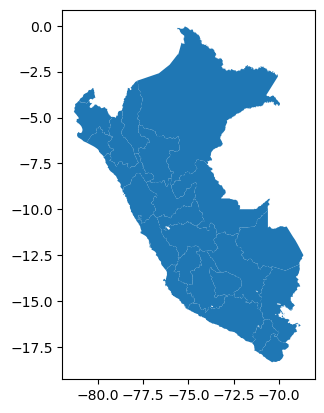

In [19]:
depa.plot()

## Question 2

## Question 3